In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
Realestate = pd.read_csv("C:\\Users\\Bhoovars\\Music\\Real estate.csv")

In [4]:
Realestate.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
Realestate = Realestate.drop("No", axis=1) #axis 1 indicates coloums
Realestate.shape

(414, 7)

In [6]:
Realestate = Realestate.drop(" transaction date", axis=1) #axis 1 indicates coloums
Realestate.shape

(414, 6)

In [7]:
Realestate.shape

(414, 6)

In [8]:
Realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   house age                             414 non-null    float64
 1    distance to the nearest MRT station  414 non-null    float64
 2    number of convenience stores         414 non-null    int64  
 3    latitude                             414 non-null    float64
 4   longitude                             414 non-null    float64
 5   Y house price of unit area            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [9]:
Realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   house age                             414 non-null    float64
 1    distance to the nearest MRT station  414 non-null    float64
 2    number of convenience stores         414 non-null    int64  
 3    latitude                             414 non-null    float64
 4   longitude                             414 non-null    float64
 5   Y house price of unit area            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [10]:
Realestate = Realestate.drop("longitude", axis=1) #axis 1 indicates coloums
Realestate.shape

(414, 5)

In [11]:
Realestate.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,37.980193
std,11.392485,1262.109595,2.945562,0.012410,13.606488
min,0.000000,23.382840,0.000000,24.932070,7.600000
25%,9.025000,289.324800,1.000000,24.963000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,46.600000
max,43.800000,6488.021000,10.000000,25.014590,117.500000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

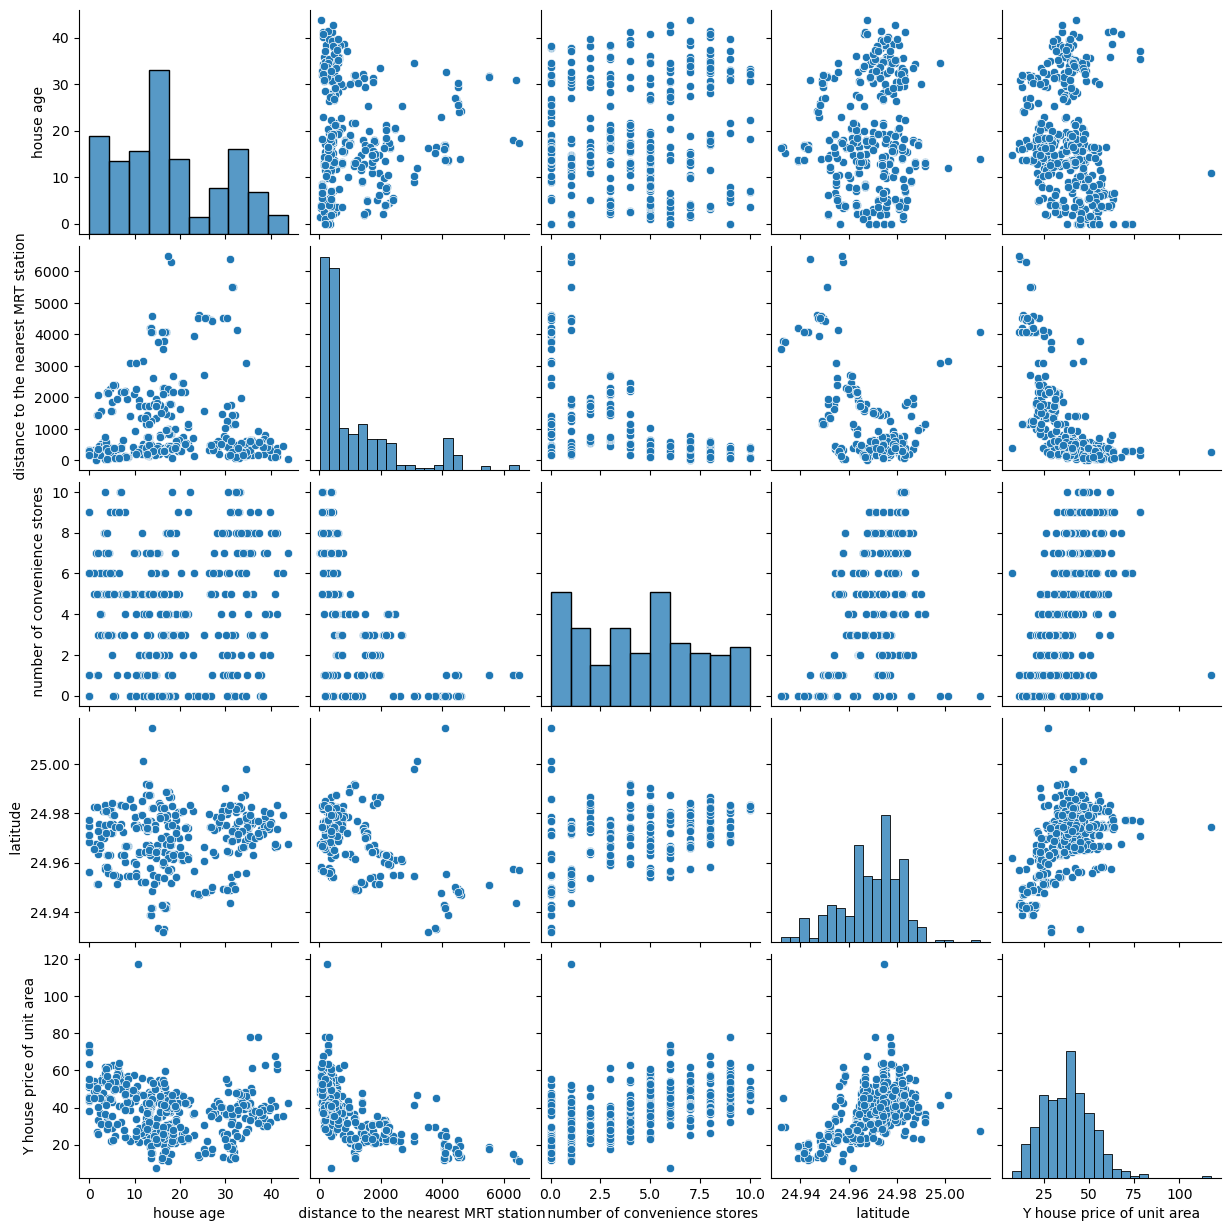

In [13]:
sns.pairplot(Realestate)
plt.show()

<Axes: xlabel=' number of convenience stores', ylabel='Y house price of unit area'>

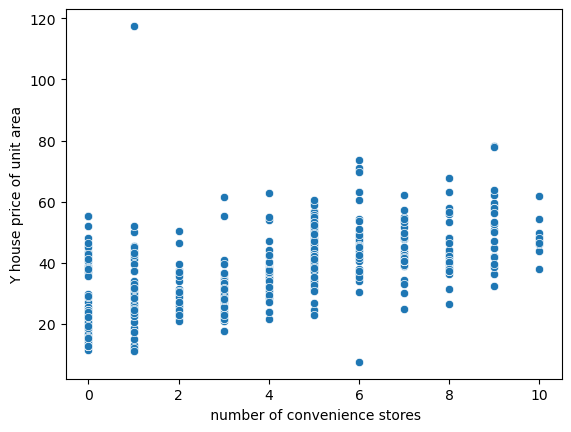

In [14]:
sns.scatterplot(x=' number of convenience stores',
                y='Y house price of unit area', data=Realestate)

<Axes: xlabel=' distance to the nearest MRT station', ylabel='Y house price of unit area'>

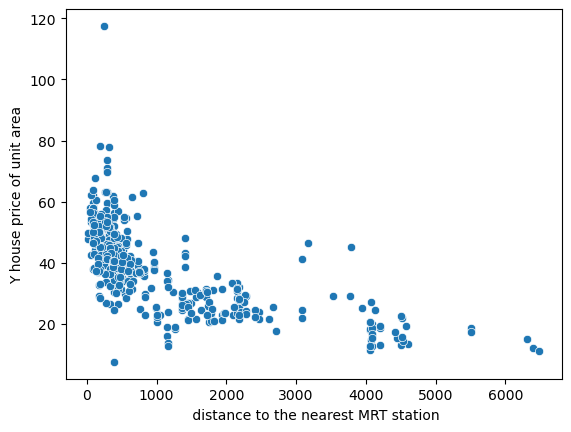

In [15]:
sns.scatterplot(x=' distance to the nearest MRT station',
                y='Y house price of unit area', data=Realestate)

<Axes: >

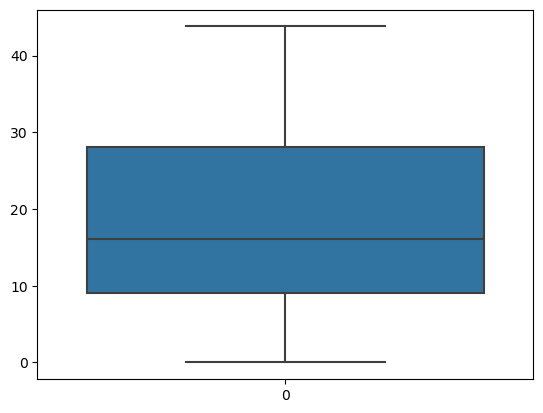

In [16]:
sns.boxplot(Realestate['house age'])

<Axes: >

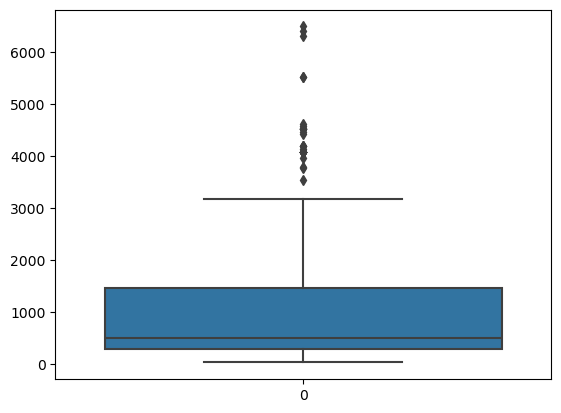

In [17]:
sns.boxplot(Realestate[' distance to the nearest MRT station'])

<Axes: >

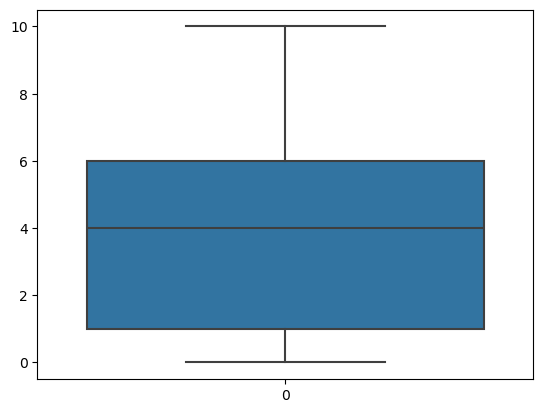

In [18]:
sns.boxplot(Realestate[' number of convenience stores'])

<Axes: >

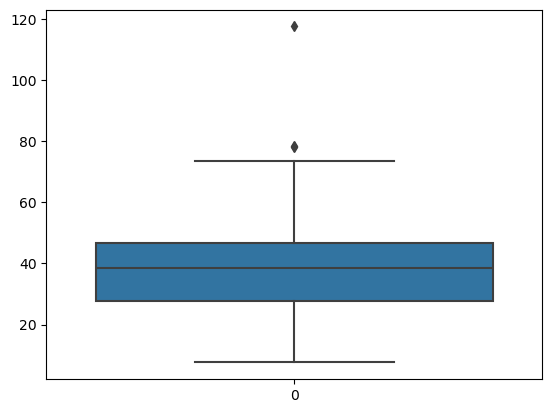

In [19]:
sns.boxplot(Realestate ['Y house price of unit area'])

In [57]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(Realestate, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
print(f"Training_set shape: records {df_train.shape}, target {df_train.shape}")
print(f"Test_set     shape: records {df_test.shape} , target {df_test.shape}")

Training_set shape: records (289, 5), target (289, 5)
Test_set     shape: records (125, 5) , target (125, 5)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
num_vars=["house age"," distance to the nearest MRT station"," number of convenience stores"," latitude","Y house price of unit area"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,Y house price of unit area
287,0.438356,0.067710,0.5,0.268783,0.230209
31,0.675799,0.115400,0.7,0.614881,0.158326
209,0.794521,0.023551,0.8,0.501697,0.303003
239,0.413242,0.125968,0.0,0.378938,0.201092
47,0.819635,0.095497,0.3,0.527872,0.490446


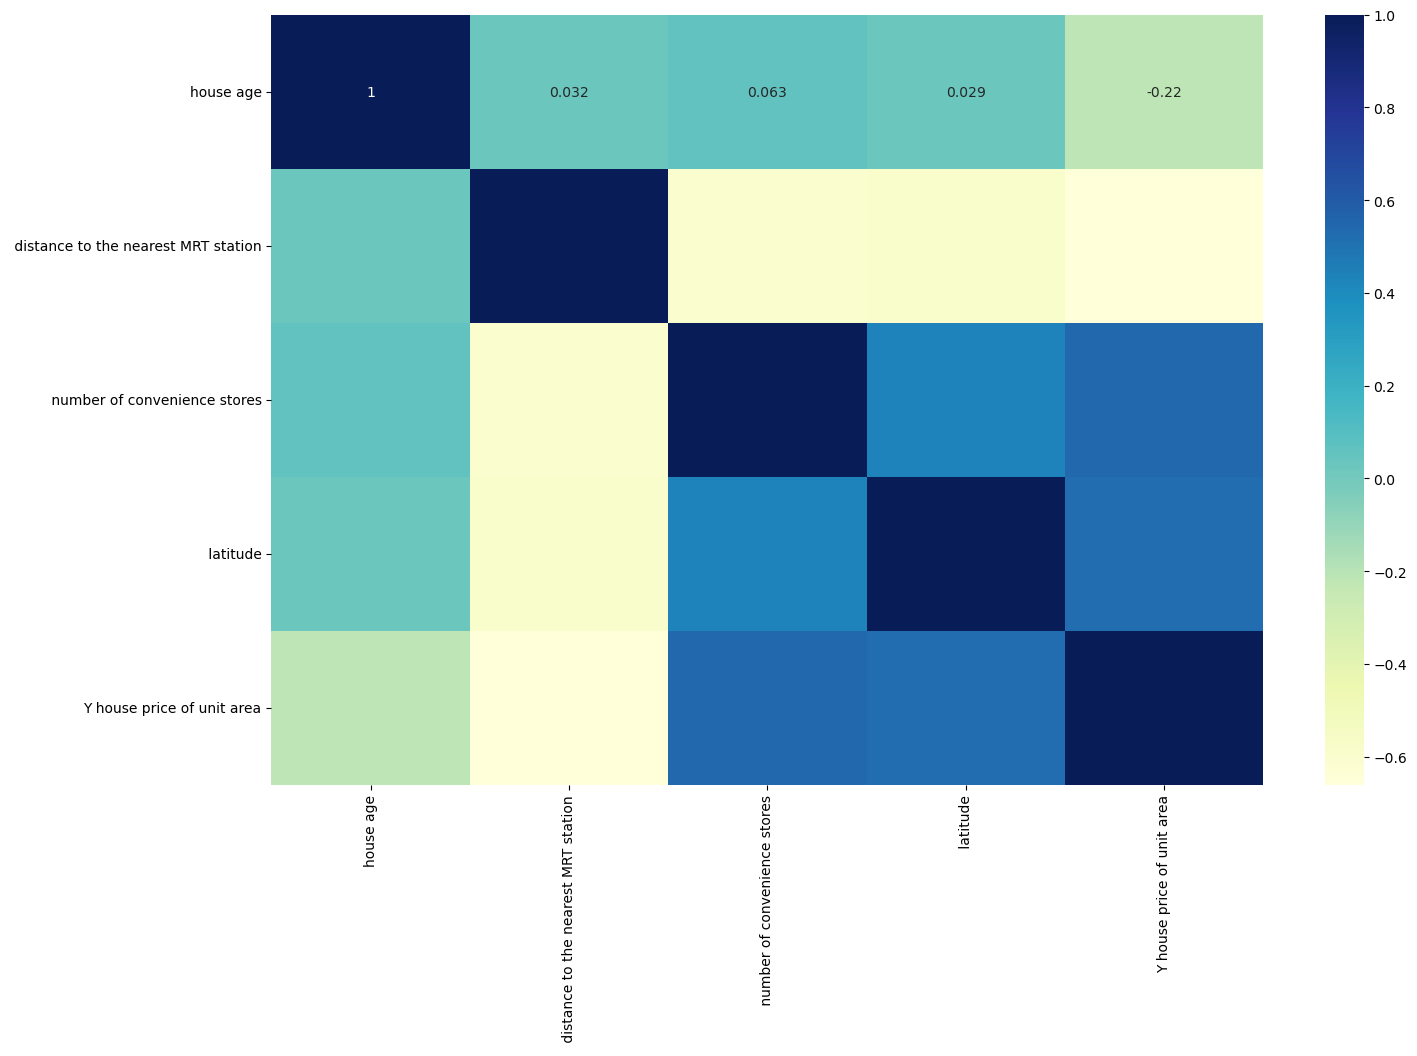

In [24]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [25]:
X_train = df_train.drop(columns ='Y house price of unit area')
y_train = df_train["Y house price of unit area"]
#X_train = df_train["house age"]

In [26]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit() 

In [27]:
lr.params

const                                   0.252700
house age                              -0.111519
 distance to the nearest MRT station   -0.253317
 number of convenience stores           0.099271
 latitude                               0.162785
dtype: float64

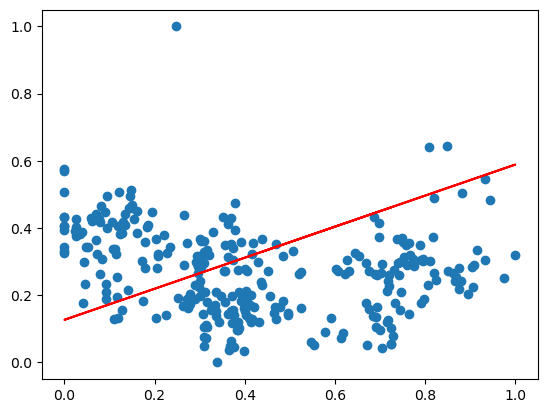

In [28]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [29]:
print(lr.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.535
Method:                         Least Squares   F-statistic:                     83.83
Date:                        Sun, 31 Mar 2024   Prob (F-statistic):           6.48e-47
Time:                                09:35:21   Log-Likelihood:                 292.59
No. Observations:                         289   AIC:                            -575.2
Df Residuals:                             284   BIC:                            -556.8
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [30]:
X_train_lm = X_train[["house age"," distance to the nearest MRT station"]]

In [31]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit() 

lr.params

const                                   0.386178
house age                              -0.097490
 distance to the nearest MRT station   -0.416413
dtype: float64

In [32]:
print(lr.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.475
Model:                                    OLS   Adj. R-squared:                  0.471
Method:                         Least Squares   F-statistic:                     129.4
Date:                        Sun, 31 Mar 2024   Prob (F-statistic):           9.71e-41
Time:                                09:35:21   Log-Likelihood:                 273.03
No. Observations:                         289   AIC:                            -540.1
Df Residuals:                             286   BIC:                            -529.1
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [33]:
X_train_lm = X_train[["house age"," distance to the nearest MRT station"," number of convenience stores"," latitude"]]

In [34]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit() 

lr.params

const                                   0.252700
house age                              -0.111519
 distance to the nearest MRT station   -0.253317
 number of convenience stores           0.099271
 latitude                               0.162785
dtype: float64

In [35]:
print(lr.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.535
Method:                         Least Squares   F-statistic:                     83.83
Date:                        Sun, 31 Mar 2024   Prob (F-statistic):           6.48e-47
Time:                                09:35:21   Log-Likelihood:                 292.59
No. Observations:                         289   AIC:                            -575.2
Df Residuals:                             284   BIC:                            -556.8
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [36]:
Realestate.columns

Index(['house age', ' distance to the nearest MRT station',
       ' number of convenience stores', ' latitude',
       'Y house price of unit area'],
      dtype='object')

In [37]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

lr_1.params

const                                   0.252700
house age                              -0.111519
 distance to the nearest MRT station   -0.253317
 number of convenience stores           0.099271
 latitude                               0.162785
dtype: float64

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train.values,float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,latitude,5.18
2,number of convenience stores,3.76
0,house age,3.33
1,distance to the nearest MRT station,1.67


In [40]:
y_train_price = lr_1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

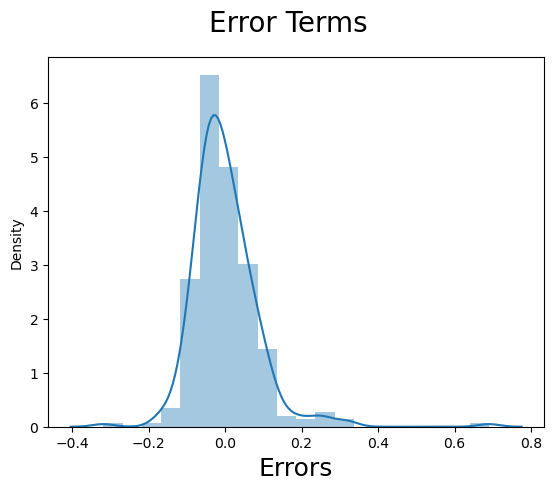

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [42]:
num_vars=["house age"," distance to the nearest MRT station"," number of convenience stores"," latitude", "Y house price of unit area"]
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [43]:
df_test.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,Y house price of unit area
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.377187,0.142509,0.450400,0.458574,0.283414
std,0.248470,0.171609,0.265677,0.134388,0.108158
min,0.000000,0.000000,0.000000,0.082162,0.047316
25%,0.226027,0.041138,0.300000,0.381726,0.213831
50%,0.335616,0.071997,0.500000,0.463282,0.294813
75%,0.463470,0.175322,0.700000,0.561561,0.346679
max,0.945205,0.971867,1.000000,0.723340,0.600546


In [44]:
y_test = df_test.pop("Y house price of unit area")
X_test = df_test

In [45]:
X_test_m4 = sm.add_constant(X_test)

In [46]:
y_pred_m4 = lr_1.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

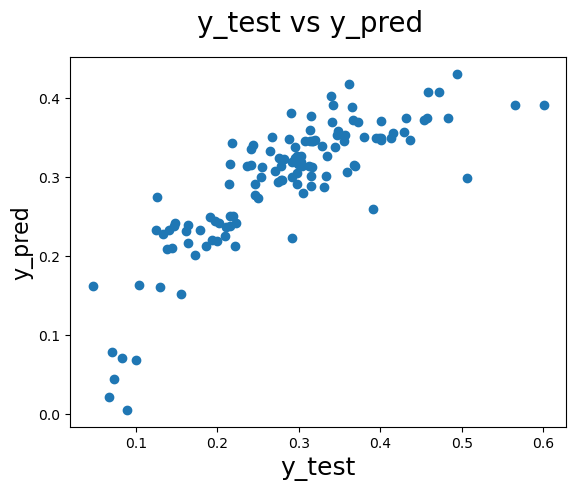

In [47]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

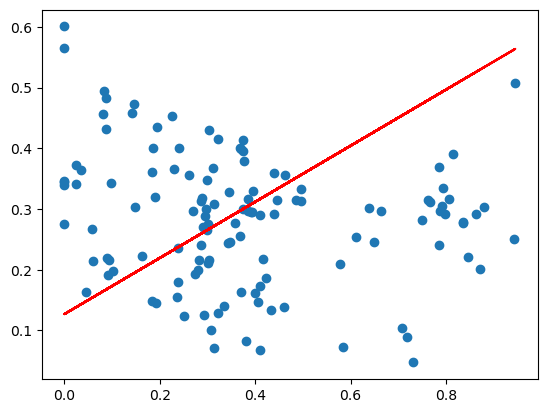

In [48]:
plt.scatter(X_test_m4.iloc[:, 1], y_test)
plt.plot(X_test_m4.iloc[:, 1], 0.127 + 0.462*X_test_m4.iloc[:, 1], 'r')
plt.show()

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [50]:
score=r2_score(y_test, y_pred_m4)
print("R2 Score is =",score) #printing the accuracy
print("MSE is =",mean_squared_error(y_test, y_pred_m4))
print("RMSE of is =",np.sqrt(mean_squared_error(y_test, y_pred_m4)))

R2 Score is = 0.6624680553750794
MSE is = 0.003916939338205526
RMSE of is = 0.06258545628343318
